# Statistics 3: Peak Integration and Internal Standards

This Python exercise will cover how to use Python to do peak integration and quantitation using internal standards. The concepts are introduced in the context of separations, but they could also be applied to other analytical techniques and data analysis problems. We will start by importing all the libraries we need. Don't forget to run this line of code with Ctrl+Enter or Shift+Enter

In [1]:
# Import Everything you Need
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

What is the area under the peak? The simplest explanation is that it is sum of the area from each data point. Remember that area is length times height for a rectangle. For discrete data points, we can calculate the area between two points from the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). Here, the area of each data point $k$ is equal to the average $y$ value times the difference in $x$: $\frac{y_k + y_{k+1}}{2} \times \Delta x$. Let's look at an example with two data points $(x_1, y_1)$ and $(x_2, y_2)$. The blue trapezoid shows the area between these two data points. We calculate this by calculating the area of the red rectangle, which is the average $y$ value times the difference in $x$ values. You can see that the area of the blue trapezoid is the same as the red rectangle. You can read more from the link above on the trapezoidal rule. 

The integral is: 13.0


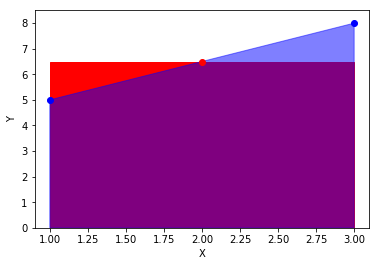

In [68]:
# Define the data points
x1 = 1
x2 = 3
y1 = 5
y2 = 8

# Calculate the average y and change in x
average_y = (y1 + y2)/2
delta_x = (x2-x1)

# Calculate the integral
integral = average_y * delta_x
print("The integral is:", integral)

# Plot the results
plt.plot(x1, y1, marker="o", color="blue")
plt.plot(x2, y2, marker="o", color="blue")
plt.plot(2, average_y, marker="o", color="red")
plt.gca().add_patch(patches.Rectangle((x1, 0),delta_x,average_y, color="red")) 
x = [x1, x2, x2, x1]
y = [0, 0, y2, y1]
plt.gca().add_patch(patches.Polygon(xy=list(zip(x,y)), color = "blue", alpha = 0.5))
plt.ylim(0,8.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

For an array, we just need to sum all of these little trapezoids together. First, let's generate a Gaussian peak:

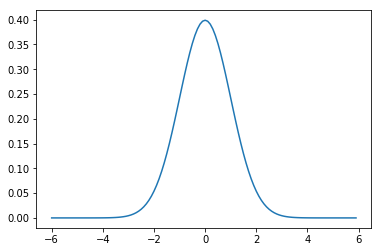

In [5]:
# Define a Gaussian distribution function (see Statistics 1 notebook)
def Gaussian(xvalues, mean, standard_deviation):
    sdsquared = standard_deviation**2
    exponent = -(xvalues - mean)**2/(2 * sdsquared)
    preexponential = 1 / np.sqrt(2 * np.pi * sdsquared)
    return preexponential * np.exp(exponent)

# Generate a list of x values
x = np.arange(-6, 6, 0.1) 

# Generate a Gaussian for a given mean and standard deviation
mean = 0
std_dev = 1
y = Gaussian(x, mean, std_dev)

# Plot the result

plt.plot(x, y)
plt.show()


Before we write our function, we need to introduce the idea of a "for" loop. For loops keep repeating a specific operation for a specific number of times. In Python, for loops are defined by a variable cycling through an array or list. In the example below, the variable is $i$ and the array is $indexes$. On the first iteration of the loop, $i=0$ (the first element in the $indexes$ array). It will execute the block of code that is indented and then go on to the next element in the $indexes$ array, $i=1$. The variables inside the for loop can get overwritten and change. To exit the for loop, remove the indent. The code below loops through $indexes$ and prints the square of each index as it goes.

In [6]:
indexes = np.arange(0, 5)
print("Starting to loop through elements in indexes:", indexes)
for k in indexes:
    print("The value of k in this loop is:", k)
    s = k**2
    print("Running Some Code...k squared is:", s)
print("For loop done")

Starting to loop through elements in indexes: [0 1 2 3 4]
The value of k in this loop is: 0
Running Some Code...k squared is: 0
The value of k in this loop is: 1
Running Some Code...k squared is: 1
The value of k in this loop is: 2
Running Some Code...k squared is: 4
The value of k in this loop is: 3
Running Some Code...k squared is: 9
The value of k in this loop is: 4
Running Some Code...k squared is: 16
For loop done


Now, let's write a function to calculate the integral. Our data point area function comes directly from the trapezoid rule above. Our integral function will just apply this to each data point in the $x$ and $y$ arrays using a for loop. Note, we need to start at the second element of the list rather than the first element because we need to compare two data points, $k$ and $k-1$. 

In [7]:
# A function to calculate the trapezoid area for two points. This comes directly from the code above.
def data_point_area(x1, x2, y1, y2):
    average_y = (y1 + y2)/2
    delta_x = (x2-x1)
    area = average_y * delta_x
    return area

# A function to calculate the integral for an array
def integral(x, y):
    length = len(x) # Calculate the length of the x array
    indexes = np.arange(1,length) # Create an array of indexes. Don't start at 0 but 1.
    sum_value = 0 # Set the sum value to 0 initially
    for k in indexes:
        # Get the correct x and y values from the list based on their indexes
        x1 = x[k-1]
        y1 = y[k-1]
        x2 = x[k]
        y2 = y[k]
        # Calculate the area for those set of two points from the function above
        area = data_point_area(x1, x2, y1, y2)
        # Add the area from the two points to the total sum
        sum_value = sum_value + area
    return sum_value

print(integral(x, y))   

0.999999997112


The integral should be almost exactly one. That is because the area of a Gaussian distribution is normalized to 1. Numpy also has a trapezoidal integral function, trapz. You can see below that our homemade function should match this. Note, this function takes $x$ as the second argument because $x$ is optional in this function. If you don't have $x$, it will assume $\Delta x$ is 1 for each data point.

In [8]:
print(np.trapz(y, x=x))

0.999999997112


The final thing we need to learn to put it all together is how to chop out specific parts of the data. I've included a function to do this using Boolean indexing. Basically, it grabs all the $x$ values that are both greater than $minx$ and less than $maxx$ and chops the array down to include only the values within that range. 

After doing that, we can calculate the area under that part of the curve only. 

Integral from -1 to 1 is: 0.656883274351


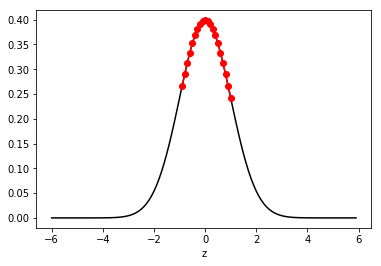

In [10]:
# Chop an array to include only x values between minx and maxx
def datachop(x, y, minx, maxx):
    boo1 = np.logical_and(x <= maxx, x >= minx)
    return x[boo1], y[boo1]

# Set the min and max
minx = -1
maxx = 1

# Get the new cut x and y arrays
cutx, cuty = datachop(x, y, minx, maxx)

# Calculate the area under the cut arrays
area = integral(cutx, cuty)
print("Integral from", minx, "to", maxx, "is:", area)

# Plot the cut arrays in red against the original in black
plt.plot(x, y, color="black")
plt.plot(cutx, cuty, marker="o", color="red")
plt.xlabel("z")
plt.show()

Now, we should put everything together to make it easier and in one function.

In [11]:
def integral_range(x, y, minx, maxx):
    cutx, cuty = datachop(x, y, minx, maxx)
    area = np.trapz(cuty, x = cutx)
    return area

# Test it
print(integral_range(x, y, minx,maxx))

0.656883274351


Because the mean is 0 and the standard deviation is 1, the $x$ axis is actually $z$ values from page 67 in the Harris textbook. Take a look at Figure 4-3 and compare it with the plot above. The values you calculate here should be very close to twice the value of $z=1$ from table 4-1. The reason it is twice is that the $z$ value in the table is from $z=0$ to $z=1$ and we are going from $z=-1$ to $z=1$.

**Problem 1:** Using the code above, calculate the area under our Gaussian curve from the range of -2 to +2 standard deviations. This should be near 95%. 

In [75]:
# Your code here!

Now, let's apply what you've learned to a simulated chromatogram. This code will generate two peaks with different retention times and widths.

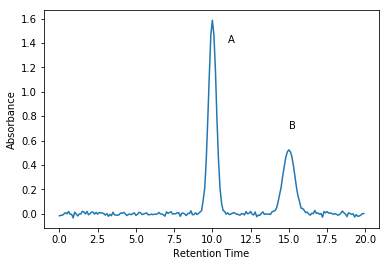

In [12]:
# Set the retention times
t1 = 10
t2 = 15

# Set the peak widths
w1 = 1
w2 = 1.5

# Define the x axis
x = np.arange(0,20, 0.1)

# Sum together two gaussians and some noise. Note, the second one is set to have half the area of the first
y = Gaussian(x, t1, w1/4) + 0.5*Gaussian(x, t2, w2/4) + np.random.normal(0,0.01, len(x))

# Plot the results
plt.plot(x, y)
plt.xlabel("Retention Time")
plt.ylabel("Absorbance")
plt.text(t1+1, 1.4, "A")
plt.text(t2, 0.7, "B")
plt.show()

**Problem 2:** Find the **a)** the area of peak A, **b)** the area of peak B, and **c)** the ratio of the area of A the area of B. Hint: the ratio of A/B should be around 2. 

In [78]:
# Your code here
# Hint: you should use the integral_range function from above

**Problem 3:** Assume peak A is the internal standard with a known molar absorptivity of 4,500 M<sup>-1</sup>cm<sup>-1</sup> and a known concentration of 5 mM. Assume peak B is our analyte with a known molar absorptivity of 3,700 M<sup>-1</sup>cm<sup>-1</sup>. **a)** What is the detector response factor, F? **b)** What is the concentration of our analyte from the chromatogram Problem 2?

In [79]:
# Your code here